![UCL](https://github.com/profLewis/Geog2021_Coursework/blob/master/images/ucl_logo.png?raw=true)


# Modelling Land Use change with socio-economic drivers

## Summary of requirements

Using the data derived from Landsat data over Shenzhen, calibrate a model that describes urban land use change as a function of a set of socioeconomic factors, following the approach of Seto et al. (2002, 2003) (of primary importance)

![](images/comp.png)

Test the model to assess uncertainty (of secondary importance)

## The model

![class_movie4](images/class_movie4.gif)

Having derived a dataset of urban land use, we can calculate urban land use change per year.

### Pre-requisites

You will need:

* `R` and `Rstudio` 
* required codes and datasets

See [this section](Rsetup.ipynb) for details on that.


### The Seto model

Following the general approach of [Seto & Kaufmann (2003)](reading/SetoandKaufmann2003.pdf), we will build a multi-linear model to attempt to describe the urban land use change per year (the 'y' variable) as a function of a number of key socioeconomic factors (e.g. capital investment, land productivity, population, wage rates, etc) (the '$x$' variables). 

We suppose that we have observation ('$y$') data for $N_{years}$ and $N_{params} - 1$ of socioeconomic factors for each of these years.

So, we will derive a (multi)*linear* model that we could phrase as:

**Equation 1:**

$$
y = p_0 + p_1 x_1 + p_2 x_2 + + p_3 x_3 + p_4 x_4 + p_5 x_5
$$



where we supply the following information:

* $y$ is a column vector of length $N_{years} - 1$ with urban land use change per year. The minus 1 is because we must calculate land use *change* from one year to the next.
* $p_n$ are the model parameters, or 'weightings' with $0 \le n \lt N_{params}$, with one parameter per socioeconomic factor, plus an 'offset' ($p_0$) that doesn't depend on these factors.
* $x_n$ are the socioeconomic data per year, with $0 \lt n \lt N_{params}$ for  $N_{years} - 1$ years (one entry for each year, for each socioeconomic factor). The minus 1 associated with $N_{params}$ is because we have an additional parameter, $p_0$.

So there are a total of $N_{params}$ *unknown* values (the model parameters $p_n$) that we need to estimate to calibrate' the model.

Following the example in the paper, we will use the following in $x$:

* $x_1$: Investment in capital construction / population
* $x_2$: value of gross agricultural output / agriculture population
* $x_3$: log(wages in non-state, non-collective units)
* $x_4$: log(average total wage)
* $x_5$: (value of gross agricultural output/Agricultural land) / (value of gross industrial output / Urban land)

This will give a model with 6 parameters that we need to estimate (i.e. 6 unknowns) that we could call $p_0, p_1, p_2, p_3, p_4, p_5$. 

Note that the final term ($x_5$) requires that we have data for Agricultural and Urban land, which we will need to derive from the remote sensing data for each year of observation.

The rest of the data will come from official statistics. An example for the years 1987 to 2000 is given below to give you a feel for the sort of information you will be using:

There are many freely available online database for downloading important socio-economic data. Some examples are the Center for International Earth Science Information Network (CIESIN) at Columbia University and the World Bank. The data we will be using here are from the [Guangdong Statistical Yearbook](http://www.gdstats.gov.cn/tjnj/2006/ml_e.htm).

![page](images/page.png)

A file with relevant data has been compiled and can be downloaded [here](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/Guangdong-Yearbook-2019.csv).

An example set of classification results are available in the file [results-2019.csv](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/results-2019.csv) that you can also download.

Note that the classification results in the file you can download are the lecturers' results and **must not** be used in student analyses (i.e. you must put in your own classification results).

You will only be able to run the model for years that you have driving (socioeconomic) and Landsat data.

## Software

To be compatible with the statistics you learn in year 1 (in The Geography Department), we will make use of the language `R`. 

As a reminder to you, the notes from the relevant 1st year practical are available to you on [moodle](https://moodle-1819.ucl.ac.uk/course/view.php?id=2712#section-5)

If you are usiung a UCL PC, you may want to use the package `Rstudio` for statistics, but on the UCL Geography (linux) system, we will use `R` at the command line.

**If you are using your own computer**, you will probably need to install software for these. 

In particular, you need:

1. Download and install R from [https://cran.rstudio.com](https://cran.rstudio.com)
2. Download and install RStudio from [https://www.rstudio.com](https://www.rstudio.com/products/rstudio/download/#download)


Make yourself aware of which computer system you are using, and which choice is appropriate for you.

## Download data files

Download the file [Guandong_Yearbook_2019.csv](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/Guangdong-Yearbook-2019.csv) from [http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/Guangdong-Yearbook-2019.csv](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/Guangdong-Yearbook-2019.csv) and **save it in the area where you are doing your work.** 

**Remember the location where you are doing your work! (note it down).**

You must also copy in a file of your classification results to the local directory. This might typically be called `results-2019.csv` or a similar name. You will have generated it when performing the classification part of the practical.

It should be a `csv` format file, and should contain *at least* columns labelled `year` and `urban_land`:

Your file should look something like this:

        index,year,urban_land
        0,1987.0,511000.0
        1,1988.0,520000.0
        2,1989.0,595000.0
        3,1990.0,656244.0
        4,1991.0,725000.0
        5,1992.0,780000.0
        6,1993.0,842833.0
        7,1994.0,938065.0
        8,1995.0,1003711.0



## Using `Rstudio`

If you are using `Rstudio`, run the software, and locate your data directory. 

This must have the files `Guangdong-Yearbook-2019.csv` and `results-2019.csv`

![r123](images/r123.png)

You should then set this as the 'working directory'


![rset1](images/rset1.png)





## Using `R`

If you are using `R` directly:
    
    * change directory to where you are doing your work, e.g.:
        
            cd ~DATA/GEOG0027/gee
            
you should be able to simply type `R` in the terminal:

            R
    

## Modelling in R

Whether you are using `R` or `Rstudio`, the steps are now the same. In `R`, you type commands at the prompt. In `Rstudio`, you type commands in the `console`.



We will develop `R` codes to read and manipulate the data in the cells below. 

In [2]:
############################
# First, change directory to where
# your (csv) files are 
############################

# change working directory to
# where our files are
#
# Be careful with the setwd command
# and check where you are first
print('I am in:')
print(getwd())

# test for this file
test = "Guangdong-Yearbook-2019.csv"

# somewhere else it might be
# if its not here 
# (put something appropriate!!)
sub = 'files'

if (test %in% list.files('.','*.csv')){
    print(paste('found',test))
}else if (test %in% list.files(sub,'*.csv')){
    print(paste('found',test,'in',sub))
    
    setwd(sub)
    
    print('I have moved to:')
    print(getwd())
}


[1] "I am in:"
[1] "/Users/plewis/Data/GEOG0027_Coursework/docs"
[1] "found Guangdong-Yearbook-2019.csv in files"
[1] "I have moved to:"
[1] "/Users/plewis/Data/GEOG0027_Coursework/docs/files"


In [3]:
############################
#
# Second, load the datasets:
#
# stats_file: files/Guangdong-Yearbook-2019.csv
# result_file: files/results-2019.csv
#
# N.B. YOU need to supply your own result_file
# DO NOT use the one provided here!!
#
############################


# The name of the file with year, urban_land and possibly agr_land
result_file <- 'results-2019.csv'
# the name of the supplied data file with Guandong stats
stats_file  <- "Guangdong-Yearbook-2019.csv"


# load library
library(readr)

# read the datasets
Guangdong_Yearbook_2019 <- read_csv(stats_file)
input                   <- read_csv(result_file)

# fix the input dataset in case arg_land doesnt exist
if('agr_land' %in% names(input)){
    print(paste('using agricultural land data from',results))
}else{
    # If no ag land variable, insert one
    print('inserting synthetic agricultural land data')
    input$agr_land = 2 * max(input$urban_land) - input$urban_land
}

# The years in Guangdong_Yearbook_2019$year and 
# input$year need to match
# so we force this with the match function in R
overlap <- match(Guangdong_Yearbook_2019$year,input$year,nomatch=0)
input <- input[overlap,]
Guangdong_Yearbook_2019 <- Guangdong_Yearbook_2019[overlap,]

# print the datasets to visualise and check it looks ok
print(input)
print(Guangdong_Yearbook_2019)


Parsed with column specification:
cols(
  index = col_double(),
  year = col_double(),
  investment = col_double(),
  population = col_double(),
  private_wage = col_double(),
  agr_output = col_double(),
  indust_output = col_double(),
  agr_pop = col_double(),
  avg_wage = col_double()
)
Parsed with column specification:
cols(
  index = col_double(),
  year = col_double(),
  urban_land = col_double()
)


[1] "inserting synthetic agricultural land data"
# A tibble: 14 x 4
   index  year urban_land agr_land
   <dbl> <dbl>      <dbl>    <dbl>
 1     0  1987     511000  3229000
 2     1  1988     520000  3220000
 3     2  1989     595000  3145000
 4     3  1990     656244  3083756
 5     4  1991     725000  3015000
 6     5  1992     780000  2960000
 7     6  1993     842833  2897167
 8     7  1994     938065  2801935
 9     8  1995    1003711  2736289
10     9  1996    1122459  2617541
11    10  1997    1250000  2490000
12    11  1998    1450000  2290000
13    12  1999    1650000  2090000
14    13  2000    1870000  1870000
# A tibble: 14 x 9
   index  year investment population private_wage agr_output indust_output
   <dbl> <dbl>      <dbl>      <dbl>        <dbl>      <dbl>         <dbl>
 1     0  1987       251.      5832.         4.12       349.          878.
 2     1  1988       354.      5928.         7.93       474.         1319.
 3     2  1989       347.      6025.        13.3     

In [4]:
############################
#
# 3rd, 
# form a data frame with the X datasets
# that we want (look at the formula)
# Note the use of input$agr_land 
# and input$urban_land in here
#
############################


X = data.frame(year=Guangdong_Yearbook_2019$year,
               x1=Guangdong_Yearbook_2019$investment/Guangdong_Yearbook_2019$population,
               x2=Guangdong_Yearbook_2019$agr_output/Guangdong_Yearbook_2019$agr_pop,
               x3=log(Guangdong_Yearbook_2019$private_wage),
               x4=log(Guangdong_Yearbook_2019$avg_wage),
               x5=(Guangdong_Yearbook_2019$agr_output/input$agr_land)/
                  (Guangdong_Yearbook_2019$indust_output/input$urban_land))


In [5]:
############################
#
# 4th, our model needs the change in urban area
# with resect to year, which we might call du_dy
#
# to get this, we need to calculate du and dy
# i.e. the change ('delta') in urban area and year
# 
# We will pack all of these datasets into a dataframe
# called model_data
#
############################

# Calculate the delta in year for observation data
# This will mostly be 1, but could be more
# if you have missing years
dy <- diff(input$year,differences = 1) 

# Calculate the delta in urban land for observation data
du <-  diff(input$urban_land,differences = 1)

# The rate of change of urban land per year
du_dy =  du / dy

# reconstruct the observation year
# from the cumulative sum of dyear
# This should give a 'year' dataset
# with one fewer entry
obs_year <- data.frame(year=input$year[c(1)] + cumsum(dy))

# Now select all columns of X that match obs_year
# and call it model_data
overlap <- match(input$year,obs_year$year,nomatch=0)
model_data <- X[overlap,]

# and add in du_dy and dy to dataset
model_data$du_dy <- du_dy
model_data$dyear <- dy
model_data$urban_land <- input$urban_land[overlap]

# save this file
write.csv(model_data, file = "model-2019.csv")

In [6]:
############################
#
# 5th, we do the linear modelling:
# multi linear fit of du_dy as function of X
# using the function lm and the x and y data
# stored in model_data
#
############################


# next time, you could skip all of the 
# above and just load the model_data ...

library(readr)
model_data <- read_csv("model-2019.csv")

fit <- lm(du_dy ~ x1 + x2 + x3 + x4 + x5, data=model_data)

print(summary(fit))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  year = col_double(),
  x1 = col_double(),
  x2 = col_double(),
  x3 = col_double(),
  x4 = col_double(),
  x5 = col_double(),
  du_dy = col_double(),
  dyear = col_double(),
  urban_land = col_double()
)



Call:
lm(formula = du_dy ~ x1 + x2 + x3 + x4 + x5, data = model_data)

Residuals:
   Min     1Q Median     3Q    Max 
-23328 -18491  -3506   7522  38790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1346051    2575068   0.523    0.617
x1             16800     337936   0.050    0.962
x2            802897     710485   1.130    0.296
x3             72200     103742   0.696    0.509
x4           -213235     367635  -0.580    0.580
x5           1761121     993690   1.772    0.120

Residual standard error: 27580 on 7 degrees of freedom
Multiple R-squared:  0.8961,	Adjusted R-squared:  0.8218 
F-statistic: 12.07 on 5 and 7 DF,  p-value: 0.002475



integer(0)

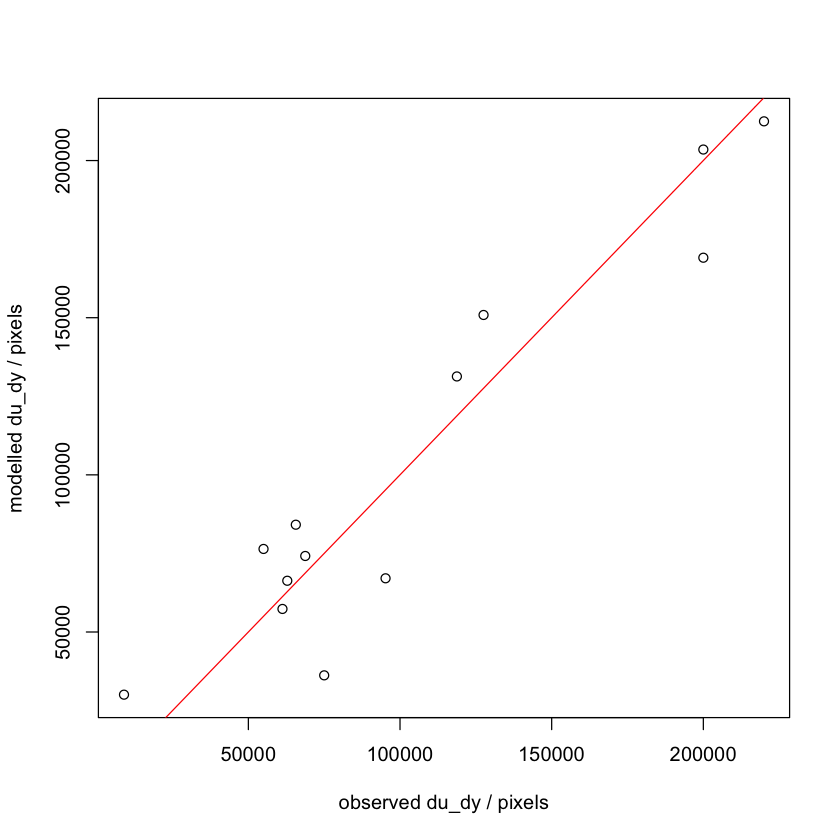

In [127]:
############################
#
# 6th, lets predict the du_dy from
# the model, and plot the measured and modelled
# values
#
############################

# predict from model
model_du_dy <- predict(fit, model_data)

plot(model_data$du_dy,model_du_dy
     ,xlab='observed du_dy / pixels',
     ,ylab='modelled du_dy / pixels') + abline(0,1,col="red")


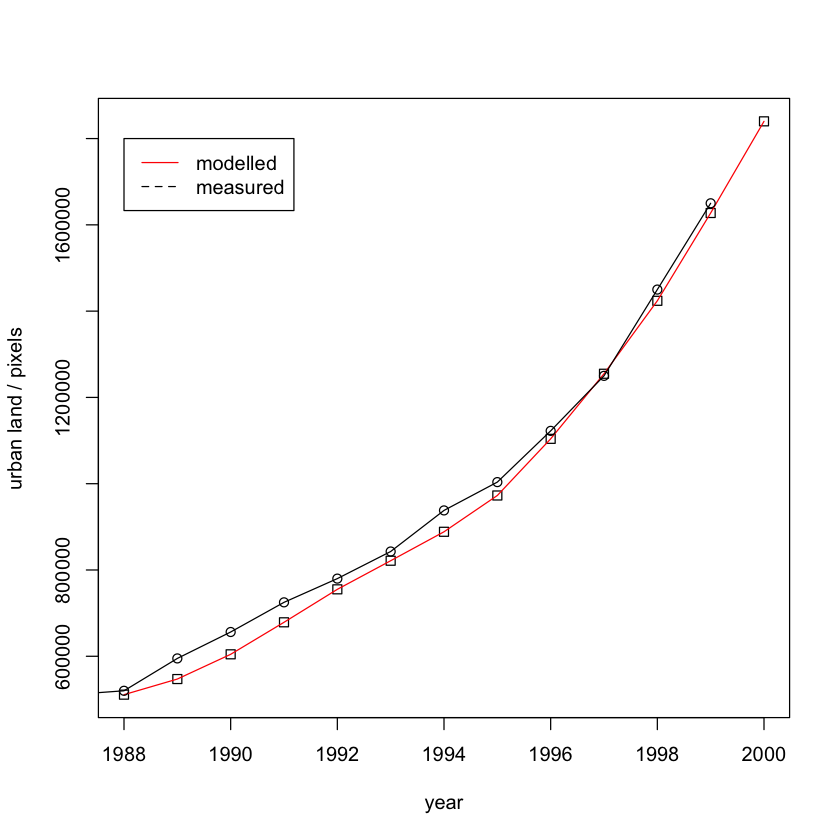

In [88]:
############################
#
# 6th, lets predict the du_dy from
# the model, and plot the measured and modelled
# values
#
############################

# Now reconstruct urban area from du_dy
modelled <- data.frame(year=model_data$year+dy[c(1)],
                       y=model_data$urban_land[c(1)] - model_du_dy[c(1)] + cumsum(model_du_dy))
measured <- data.frame(year=model_data$year,
                       y=model_data$urban_land)

# and plot the urban area measured and modelled
plot(modelled$year,modelled$y,pch=0
     ,xlab='year',
     ,ylab='urban land / pixels') 
lines(modelled$year,modelled$y,col="red")
points(measured$year,measured$y,pch=1) 
lines(measured$year,measured$y,,col="black")
legend(1988, 1800000, legend=c("modelled","measured"),
       col=c("red", "black"), lty=1:2)


In [89]:
fit$residuals

1          2          3          4          5          6          7 
-21062.066  38789.871   3908.364  -5431.764 -21424.302  -3474.844  28146.543 
         8          9         10         11         12         13 
-18490.952 -12560.864 -23327.974  30912.481  -3506.265   7521.771

## Experimentation

The codes above allow you to fit the multi-linear model to the 'observed' values of change in urban area. These observations come from monitoring urban area using satellite (Landsat) data, then claculating the change per year (`du_dy`). 

There are a few new functions, but most of the functions (including `lm`) should be familiar to you from the stats you did in the 1st year.

You should first familiarise yourself with the code blocks, and make sure the code works properly on the dataset you have generated.

The *main* result at this point is, in many ways, simply the plots and the statistics generated by `print(summary(fit))` above. But rather than just 'running' this and pasting the results into your report, you will need to demonstrate that you understand what is going on. This means you must provide a full description of what you are doing, along with the `R` code. You should interpret the statistics. Given output such as:

    Residual standard error: 27580 on 7 degrees of freedom
    Multiple R-squared:  0.8961,	Adjusted R-squared:  0.8218 
    F-statistic: 12.07 on 5 and 7 DF,  p-value: 0.002475
    
    
    Residuals:
       Min     1Q Median     3Q    Max 
    -23328 -18491  -3506   7522  38790 

    Coefficients:
                Estimate Std. Error t value Pr(>|t|)
    (Intercept)  1346051    2575068   0.523    0.617
    x1             16800     337936   0.050    0.962
    x2            802897     710485   1.130    0.296
    x3             72200     103742   0.696    0.509
    x4           -213235     367635  -0.580    0.580
    x5           1761121     993690   1.772    0.120

### The sort of questions you should ask of the data / results

What are the numbers we should be looking at to interpret different features of the model? 

First, let's consider:

    What does `Adjusted R-squared` tell us? 

You may need to look this up to get a formal definition, but you should at least note that it is a measure of goodness of fit of the model to the observations, that has some account taken of the number of model parameters.

    Why do you need to take account of the number of parameters?
    
An interesting question following on from thinking about `Adjusted R-squared` is:

    Can we form a model with fewer parameters, but a lower Adjusted R-squared?
    
An example of this is:


In [129]:
# original model
fit <- lm(du_dy ~ x1 + x2 + x3 + x4 + x5, data=model_data)
model_du_dy <- predict(fit, model_data)
print(fit$call)
print(summary(fit)$adj.r.squared)

# lets try another model
fit1 <- lm(du_dy ~ x2 + x3 +  0 , data=model_data)
model_du_dy1 <- predict(fit1, model_data)
print(fit1$call)
print(summary(fit1)$adj.r.squared)

lm(formula = du_dy ~ x1 + x2 + x3 + x4 + x5, data = model_data)
[1] 0.8218426
lm(formula = du_dy ~ x2 + x3 + 0, data = model_data)
[1] 0.9356219


So, the model `du_dy = p2 x2 + p3 x3` is seemingly 'better' than the full model.

This suggests that (in this case) rather than simply accept the full model, we shouyld try to develop an improved, reduced model.

With different input values, you will likely get different resulrts for the 'best' model, but you will still need to experiment with the model terms to justify a final model choice.


Additional questions:

    What do the parameters tell us? 
    
    What is their 'physical' meaning? (and units)
    
    Are the paremeter values statistically significant (at some given level)?

    What is the standard error of the parameters? 

    What does `Pr(>|t|)` tell us?

    What are the `F-statistic` and `p-value` terms telling us? 

Relate this to what you can see in any graphs of the data and model. 

You should also look at residuals (`fit$residuals`) to see if there might be any 'outliers' in your data (e.g. values of urban area that just don't fit the general pattern and are likely to be errors in interpretation of the Landsat data). If you wish to discard any points from the analysis (e.g. outliers) make sure you provide sufficient justification (e.g. show the classified images to demonstrate why a particular data is 'wrong' (a mis-interpretation).

### Additonal experiments

So long as you have covered the basic requirements, you can aim for higher marks by completing some additional analysis. The amount of extra marks would be a function of the relevance of the experiments (so, explain the relevance) and how well you have executed and described them. 

One example that you might consider:

#### Improved model testing

The model we have developed so far used all of the data points for model calibration. The statistics we looked at above can tell us something about the performance and value of the model, but it is often better to seek independent confirmation of model performance.

In this case, that would mean, for example, taking the first `N` years of data to calibrate the model, and using the last `M` years to test the model, where `N + M = number of years of data`.

In [116]:
#########################
#
# We can take a subset of data 
# from model_data
#
#########################

# a utility function: last + first elements
last <- function(x) { tail(x, n = 1) }
first <- function(x) { head(x, n = 1) }

# N needs to be *at least* the number
# of parameters + 1 and more like 2 x
# the number of parameters or more
N = 10

ystart = first(model_data$year)
yend = last(model_data$year)
M = yend - ystart - N
# sub-dataset for year from ystart for count years
train = model_data[model_data$year %in% seq(ystart,ystart+N-1),]
test  = model_data[model_data$year %in% seq(ystart+N+1,yend),]

print(c(M,'years of testing data:'))
print(test)

#########################
#
# train
#
#########################
fits <- lm(du_dy ~ x1 + x2 + x3 + x4 + x5, data=train)

[1] "2"                      "years of testing data:"
# A tibble: 2 x 10
     X1  year    x1    x2    x3    x4     x5  du_dy dyear urban_land
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>  <dbl>  <dbl> <dbl>      <dbl>
1    12  1998 0.375 0.348  5.58  9.23 0.0783 200000     1    1450000
2    13  1999 0.415 0.347  5.71  9.33 0.0900 220000     1    1650000


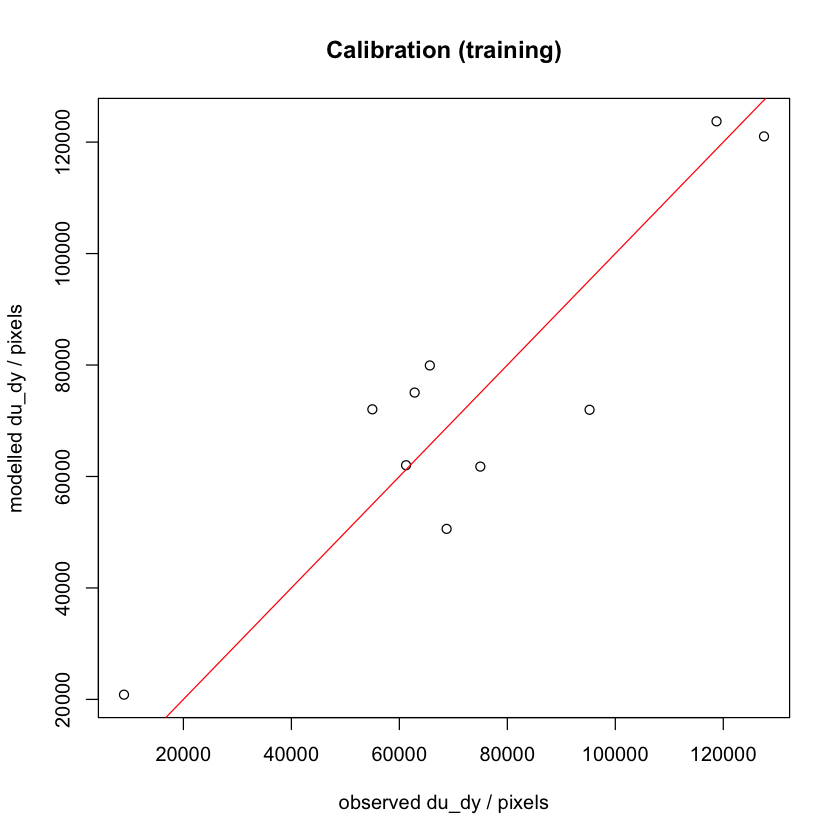

In [126]:
# and plot the training
# predict from model
model_du_dy <- predict(fits, train)

plot(train$du_dy,model_du_dy
     ,xlab='observed du_dy / pixels',
     ,ylab='modelled du_dy / pixels')
abline(0,1,col="red")
title('Calibration (training)')

In [130]:
predict(fits, test) - 

1         2 
 58438.38 -11626.07

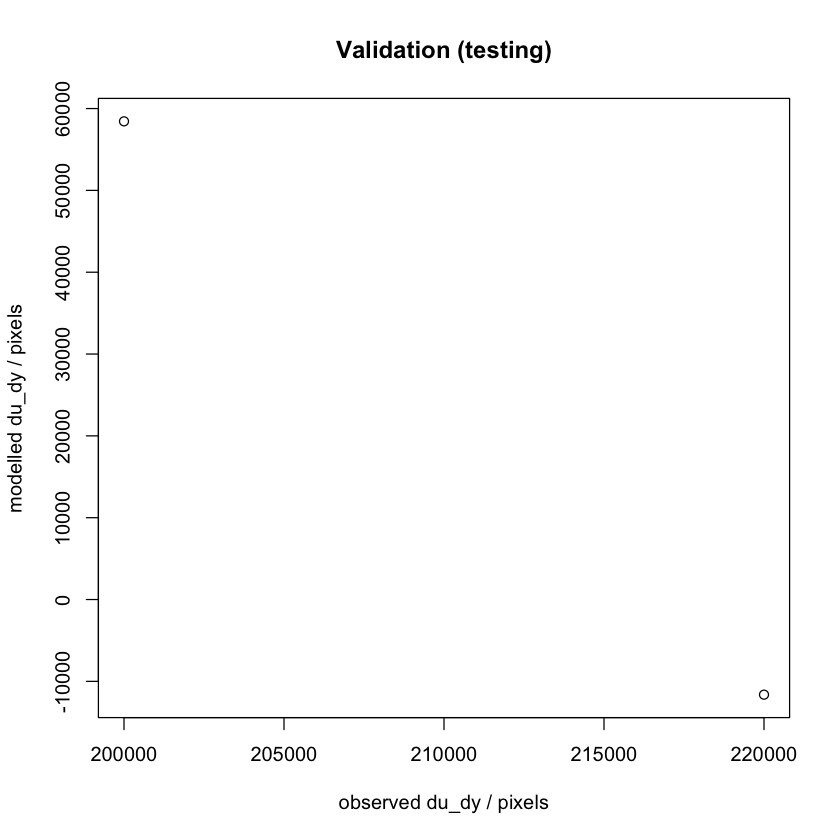

In [125]:
# and plot the training
# predict from model
model_du_dy <- predict(fits, test)

plot(test$du_dy,model_du_dy
     ,xlab='observed du_dy / pixels',
     ,ylab='modelled du_dy / pixels')
abline(0,1,col="red")
title('Validation (testing)')

In [11]:
%%R

#########################
#
# What if we used fewer data points?
#
#########################
count <- 10

# loop over count years 
for (y0 in seq(first(model_data$year),last(model_data$year)-count,1)){
    years <- seq(y0,y0+count-1)
    sub = model_data[model_data$year %in% years,]
    fits <- lm(du_dy ~ x2 + x5  , data=sub)


    print(sub)
    print(fits$coefficients)
    print(summary(fits))
}

#fit <- lm(du_dy ~ x1 + x2 + x3 + x4 + x5, data=model_data)


#c(array(fit$coefficients))

# A tibble: 10 x 10
      X1  year     x1     x2    x3    x4     x5  du_dy dyear urban_land
   <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl>  <dbl>  <dbl> <dbl>      <dbl>
 1     1  1987 0.0430 0.0771  1.42  7.46 0.0628   9000     1     511000
 2     2  1988 0.0596 0.104   2.07  7.72 0.0580  75000     1     520000
 3     3  1989 0.0576 0.119   2.59  7.89 0.0630  61244     1     595000
 4     4  1990 0.0611 0.126   2.91  7.98 0.0672  68756     1     656244
 5     5  1991 0.0753 0.136   3.34  8.12 0.0624  55000     1     725000
 6     6  1992 0.143  0.153   3.70  8.30 0.0558  62833     1     780000
 7     7  1993 0.248  0.188   4.26  8.58 0.0499  95232     1     842833
 8     8  1994 0.320  0.244   4.64  8.87 0.0530  65646     1     938065
 9     9  1995 0.343  0.304   5.02  9.02 0.0545 118748     1    1003711
10    10  1996 0.337  0.329   5.07  9.12 0.0643 127541     1    1122459
(Intercept)          x2          x5 
   18598.03   325284.88   -44338.31 

Call:
lm(formula = du_dy ~ x2 + x5, data 